# Spectrogram

### This notebook takes the .mp3 files in the directory 'audio_path' and extract the spectrogram and save in a .png file

In [1]:
import librosa, librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audio_path = '/Users/gioelepozzi/Desktop/MasterThesis/code/spectrogram/data/1.mp3'

x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

Audio Sampling Rate: 22050 samples/sec
Total Samples: 706176
Audio Length: 32.02612244897959 s


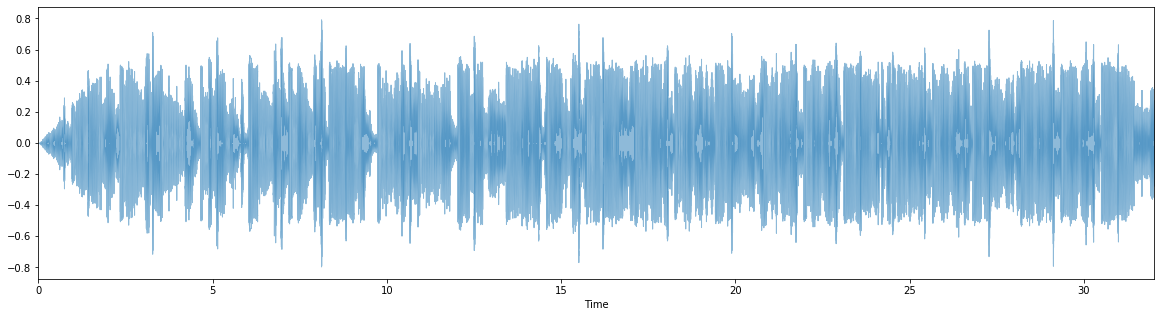

In [3]:
# audio specs

print('Audio Sampling Rate: '+str(sr)+' samples/sec')
print('Total Samples: '+str(np.size(x)))
secs=np.size(x)/sr
print('Audio Length: '+str(secs)+' s')
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr, alpha=0.5)

In [4]:
X = librosa.stft(x)
print('This STFT has',X.shape[0],'frequency bins and',X.shape[1],'frames in time.')

# log amplitude
XdB = librosa.amplitude_to_db(abs(X))

This STFT has 1025 frequency bins and 1380 frames in time.


### spectrogram with librosa (~320 ms)

CPU times: user 315 ms, sys: 19.2 ms, total: 334 ms
Wall time: 201 ms


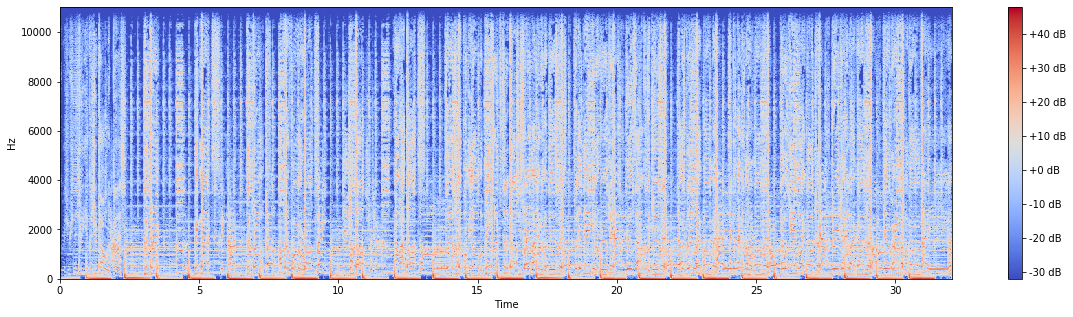

In [5]:
%%time
plt.figure(figsize=(20, 5))
librosa.display.specshow(XdB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(XdB, sr=sr)
plt.savefig('1.png', bbox_inches='tight')

### spectrogram with matplotlib.pyplot.spectrogram (~150 ms)

In [ ]:
%%time
plt.figure(figsize=(20, 5))
plt.specgram(x, NFFT=X.shape[0], Fs=sr)
plt.colorbar(format='%+2.0f dB')

# Function to create spectrogram and save in a .png

In [20]:
from natsort import natsorted
import os

def spectrogram(audio_path, img_path):
    for mp3_file in natsorted(os.listdir(audio_path)):
        if mp3_file[-4:] == '.mp3':
            file_name = os.path.basename(mp3_file)
            music_ID = file_name.split('.')[0]
            print('filename',file_name,'music_ID',music_ID)
            x, sr = librosa.load(audio_path + '/'+ file_name)
            X = librosa.stft(x)
            plt.specgram(x, NFFT=X.shape[0], Fs=sr)
            plt.savefig(img_path + '/' + music_ID + '.png', bbox_inches='tight')  

filename 1.mp3 music_ID 1
filename 4.mp3 music_ID 4
filename 5.mp3 music_ID 5


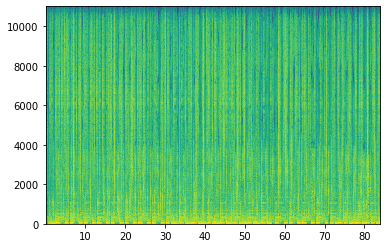

In [21]:
audio_path = '/Users/gioelepozzi/Desktop/MasterThesis/code/spectrogram/data'
img_path = '/Users/gioelepozzi/Desktop/MasterThesis/code/spectrogram/img'

spectrogram(audio_path, img_path)